# Análise de acidentes em aeródromos

## Importando bibliotecas

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

## Definindo cores e gráficos

In [39]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("viridis")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("ticks")
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(16,9)})

## Importando o dataset

In [40]:
aero=pd.read_csv('ocoraero.csv')
aero.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
3,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
4,201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,...,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5,200808073991179,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-9.1194,-68.5978,CEREJEIRAS,RO,BRASIL,...,15:10:00,NaN,FINALIZADA,A - 517/CENIPA/2016,SIM,2016-07-07,0,1,SIM,2018-08-28
6,201108118145873,ACIDENTE,POUSO LONGO,EXCURSÃO DE PISTA,RE,3.7119,-64.1625,AMAJARI,RR,BRASIL,...,17:00:00,NaN,FINALIZADA,A-105/CENIPA/2012,SIM,2012-09-20,4,1,NÃO,2018-08-28
7,201604251335501,INCIDENTE GRAVE,TRÁFEGO AÉREO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO,MAC,3.5544,-61.8694,AMAJARI,RR,BRASIL,...,05:48:00,SIM,ATIVA,IG-069/CENIPA/2016,NÃO,NaN,0,2,NÃO,2018-08-28
8,201604062021424,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.7633,-62.4094,AMAJARI,RR,BRASIL,...,16:05:00,SIM,FINALIZADA,A-063/CENIPA/2016,SIM,2017-06-22,2,1,SIM,2018-08-28
9,200902274965349,INCIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.6521,-61.4206,AMAJARI,RR,BRASIL,...,16:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,SIM,2018-08-28


In [41]:
# Verificando a quantidade de dados
aero.shape

(5208, 22)

In [42]:
# verificando os tipos de dados
aero.dtypes

codigo_ocorrencia                   int64
ocorrencia_classificacao           object
ocorrencia_tipo                    object
ocorrencia_tipo_categoria          object
ocorrencia_tipo_icao               object
ocorrencia_latitude               float64
ocorrencia_longitude              float64
ocorrencia_cidade                  object
ocorrencia_uf                      object
ocorrencia_pais                    object
ocorrencia_aerodromo               object
ocorrencia_dia                     object
ocorrencia_horario                 object
investigacao_aeronave_liberada     object
investigacao_status                object
divulgacao_relatorio_numero        object
divulgacao_relatorio_publicado     object
divulgacao_dia_publicacao          object
total_recomendacoes                 int64
total_aeronaves_envolvidas          int64
ocorrencia_saida_pista             object
ocorrencia_dia_extracao            object
dtype: object

In [43]:
# Verificando dados que são nulos
aero.isnull().sum()

codigo_ocorrencia                    0
ocorrencia_classificacao             0
ocorrencia_tipo                      0
ocorrencia_tipo_categoria            0
ocorrencia_tipo_icao                 0
ocorrencia_latitude                  0
ocorrencia_longitude                 0
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_horario                   0
investigacao_aeronave_liberada    4098
investigacao_status                  0
divulgacao_relatorio_numero          0
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         3947
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
ocorrencia_dia_extracao              0
dtype: int64

## Organizando o dataset

In [44]:
# Retirando a coluna país
aero.drop(['ocorrencia_pais'], axis=1, inplace=True)
aero.head(5)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,SJOG,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,SSKW,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,SSKW,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
3,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,SSKW,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
4,201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,****,...,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


## Avaliando a quantidade de ocorrências gerais

In [45]:
aero.ocorrencia_tipo_categoria.unique()

array(['FALHA OU MAU FUNCIONAMENTO DO MOTOR',
       'COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO', 'AERÓDROMO',
       'CONTATO ANORMAL COM A PISTA', 'OUTROS',
       'PERDA DE CONTROLE NO SOLO', 'EXCURSÃO DE PISTA',
       'PERDA DE SEPARAÇÃO / COLISÃO EM VOO', 'PERDA DE CONTROLE EM VOO',
       'FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE',
       'INDETERMINADO', 'VOO CONTROLADO CONTRA O TERRENO',
       'INCURSÃO EM PISTA',
       'FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE ',
       'POUSO AQUÉM/ALÉM DA PISTA', 'MÉDICO', 'COLISÃO NO SOLO',
       'FOGO/FUMAÇA (SEM IMPACTO)', 'COMBUSTÍVEL', 'TURBULÊNCIA',
       'OPERAÇÃO A BAIXA ALTITUDE', 'CONTATO ANORMAL COM A PISTA ',
       'CORTANTE DE VENTO / TEMPESTADE', 'OPERAÇÕES NO SOLO',
       'RELACIONADO COM SECURITY', 'MANOBRA ABRUPTA'], dtype=object)

In [46]:
ocor=aero.ocorrencia_tipo.value_counts().head(10)
ocor

FALHA DO MOTOR EM VOO                                  682
ESTOURO DE PNEU                                        604
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     574
PERDA DE CONTROLE NO SOLO                              492
OUTROS                                                 350
PERDA DE CONTROLE EM VOO                               345
COM TREM DE POUSO                                      325
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO      190
TRÁFEGO AÉREO                                          138
COLISÃO COM OBSTÁCULOS NO SOLO                         113
Name: ocorrencia_tipo, dtype: int64

[Text(0, 0, 'FALHA DO MOTOR EM VOO'),
 Text(0, 0, 'ESTOURO DE PNEU'),
 Text(0, 0, 'FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE '),
 Text(0, 0, 'PERDA DE CONTROLE NO SOLO'),
 Text(0, 0, 'OUTROS'),
 Text(0, 0, 'PERDA DE CONTROLE EM VOO'),
 Text(0, 0, 'COM TREM DE POUSO'),
 Text(0, 0, 'COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO'),
 Text(0, 0, 'TRÁFEGO AÉREO'),
 Text(0, 0, 'COLISÃO COM OBSTÁCULOS NO SOLO')]

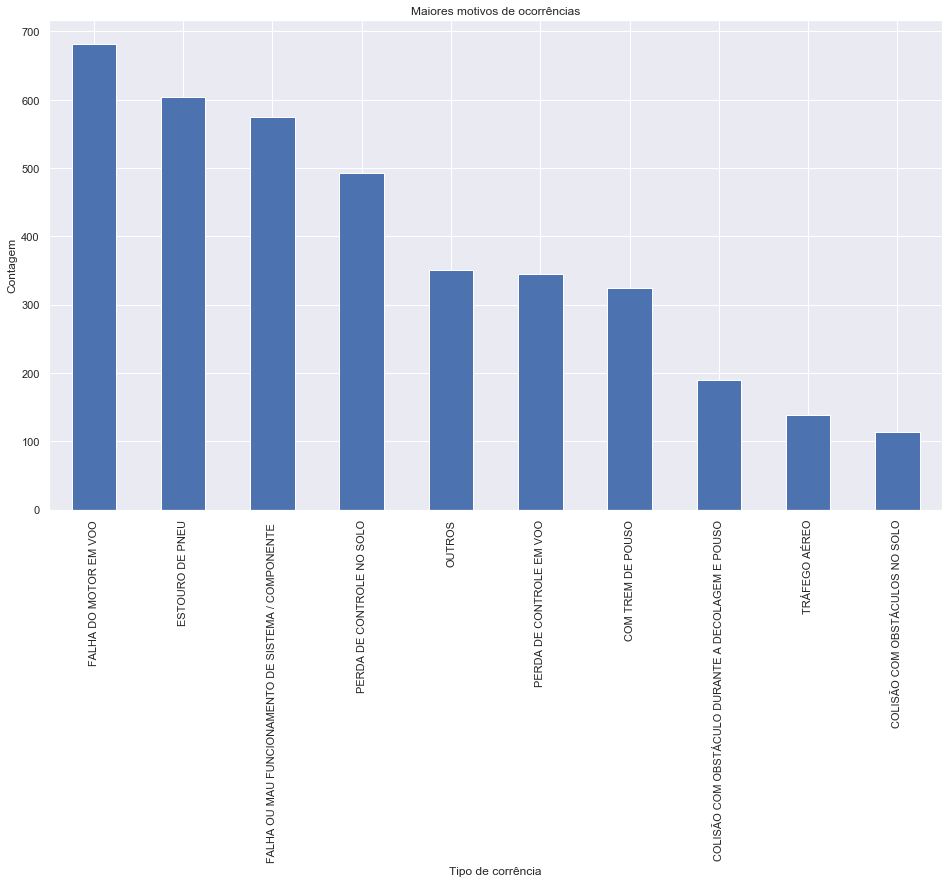

In [47]:
gr1=ocor.plot(kind='bar')
gr1.set_title('Maiores motivos de ocorrências')
gr1.set_ylabel('Contagem')
gr1.set_xlabel('Tipo de corrência')
gr1.set_xticklabels(gr1.get_xticklabels(), rotation=90)

## Analisando os aeródromos com maiores casos de ocorrências

In [48]:
aero.ocorrencia_aerodromo.unique()

array(['SJOG', 'SSKW', '****', 'SWAQ', 'SWUQ', 'SDAG', 'SDMC', 'SJXY',
       'SBBV', 'SBBR', 'SIQE', 'SBJI', 'SBRB', 'SSJL', 'SWPD', 'SBCZ',
       'SNCW', 'SBPV', 'SWRO', 'SJLU', 'SWEN', 'SBAT', 'SBMQ', 'SJKI',
       'SBVH', 'SNAU', 'SBAR', 'SNJD', 'SWMV', 'SSPX', 'SIMB', 'SSMH',
       'SSLT', 'SWDC', 'SWBC', 'SSPQ', 'SDMM', 'SBOI', 'SBMD', 'SBHT',
       'SJJJ', 'SDXF', 'SIFV', 'SBTK', 'SBBZ', 'SBCB', '9PFX', 'SJYR',
       'SJLO', 'SWNK', 'SNBG', 'SDKH', 'SWCA', 'SNAZ', 'SBCP', 'SBFS',
       '9PFC', 'SSGX', 'SWNS', 'SBAN', 'SNKI', 'SWKO', 'SBUY', 'SDEM',
       '5JTI', 'SNBS', 'SBBE', 'SBJC', 'SWEI', 'SJFU', 'SNCX', 'SSOG',
       'SSCE', 'SWOB', 'SDAI', 'SJVO', 'SWBB', 'SNAR', 'SSRS', 'SBBW',
       'SSSE', 'SNVS', 'SNGG', 'SNKK', 'SDDN', 'SSBG', 'SNOD', 'SWGN',
       'SBKP', '####', 'SSTH', 'SSZL', 'SBME', '9PAA', 'SSBL', 'SNGA',
       'SIVU', 'SWLB', 'SSBR', 'SIQH', 'SWNH', 'SWKC', 'SWWF', 'SNXW',
       'SNOG', 'SNWC', 'SBEG', 'SWFN', 'SIBO', 'SJTO', 'SDLZ', 'SWEK',
      

In [49]:
aerodromo=aero.ocorrencia_aerodromo.value_counts().head(20)
aerodromo

****    2110
SBGR     139
SBBH     106
SBMT     105
SBBR     102
SBLO      93
SBGL      79
SBJR      75
SBSP      73
SBPA      72
SBSV      63
SBKP      63
SBGO      62
SBJD      61
SBEG      58
SBRJ      53
SBCT      48
SBBI      46
SBRP      43
SBCF      41
Name: ocorrencia_aerodromo, dtype: int64

# criando um sub dataset sem as ocorrências ****

In [50]:
aero1=aero[aero.ocorrencia_aerodromo != '****']
aero1

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,SJOG,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,SSKW,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,SSKW,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
3,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,SSKW,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
8,201604062021424,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.7633,-62.4094,AMAJARI,RR,SWAQ,...,16:05:00,SIM,FINALIZADA,A-063/CENIPA/2016,SIM,2017-06-22,2,1,SIM,2018-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,201310121452072,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-21.5571,-45.4319,VARGINHA,MG,SBVG,...,12:25:00,NaN,FINALIZADA,IG-182/CENIPA/2013,SIM,2015-02-09,0,1,NÃO,2018-08-28
5187,201505293589133,ACIDENTE,POUSO LONGO,EXCURSÃO DE PISTA,RE,-20.7447,-42.8419,VIÇOSA,MG,SNVC,...,19:10:00,NaN,FINALIZADA,A-080/CENIPA/2015,SIM,2016-06-16,1,1,NÃO,2018-08-28
5188,201406236453857,INCIDENTE GRAVE,OUTROS,OUTROS,OTHR,-30.8394,-55.5672,SANTANA DO LIVRAMENTO,RS,SSZW,...,13:45:00,NaN,FINALIZADA,IG-114/CENIPA/2014,SIM,2015-04-24,0,1,NÃO,2018-08-28
5189,201704150134378,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-30.8436,-55.5728,SANTANA DO LIVRAMENTO,RS,SIXD,...,15:30:00,SIM,FINALIZADA,A-059/CENIPA/2017,SIM,2018-05-10,0,1,SIM,2018-08-28


In [51]:
aerodromo=aero1.ocorrencia_aerodromo.value_counts().head(20)
aerodromo

SBGR    139
SBBH    106
SBMT    105
SBBR    102
SBLO     93
SBGL     79
SBJR     75
SBSP     73
SBPA     72
SBKP     63
SBSV     63
SBGO     62
SBJD     61
SBEG     58
SBRJ     53
SBCT     48
SBBI     46
SBRP     43
SBCF     41
SBRF     41
Name: ocorrencia_aerodromo, dtype: int64

[Text(0, 0, 'SBGR'),
 Text(0, 0, 'SBBH'),
 Text(0, 0, 'SBMT'),
 Text(0, 0, 'SBBR'),
 Text(0, 0, 'SBLO'),
 Text(0, 0, 'SBGL'),
 Text(0, 0, 'SBJR'),
 Text(0, 0, 'SBSP'),
 Text(0, 0, 'SBPA'),
 Text(0, 0, 'SBKP'),
 Text(0, 0, 'SBSV'),
 Text(0, 0, 'SBGO'),
 Text(0, 0, 'SBJD'),
 Text(0, 0, 'SBEG'),
 Text(0, 0, 'SBRJ'),
 Text(0, 0, 'SBCT'),
 Text(0, 0, 'SBBI'),
 Text(0, 0, 'SBRP'),
 Text(0, 0, 'SBCF'),
 Text(0, 0, 'SBRF')]

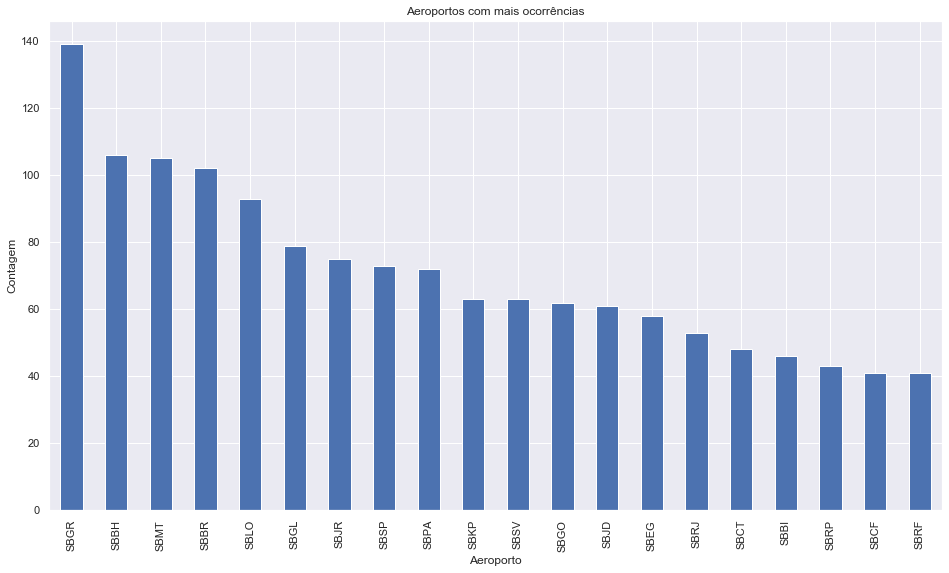

In [52]:
gr2=aerodromo.plot(kind='bar')
gr2.set_title('Aeroportos com mais ocorrências')
gr2.set_ylabel('Contagem')
gr2.set_xlabel('Aeroporto')
gr2.set_xticklabels(gr2.get_xticklabels(), rotation=90)

## Filtrando no sub dataset apenas ocorrências em aeródromos

In [53]:
aero2 = aero1.query('ocorrencia_tipo == "PERDA DE CONTROLE NO SOLO" | ocorrencia_tipo == "COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO" | ocorrencia_tipo == "PERDA DE CONTROLE NO SOLO"')
aero2

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,SSKW,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
8,201604062021424,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.7633,-62.4094,AMAJARI,RR,SWAQ,...,16:05:00,SIM,FINALIZADA,A-063/CENIPA/2016,SIM,2017-06-22,2,1,SIM,2018-08-28
243,201107127555911,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-8.7936,-63.8581,PORTO VELHO,RO,SWRO,...,21:20:00,NaN,FINALIZADA,A-019/CENIPA/2014,SIM,2014-06-02,2,1,NÃO,2018-08-28
293,201505176792081,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-10.9853,-37.0733,ARACAJU,SE,SBAR,...,17:40:00,NaN,FINALIZADA,A-073/CENIPA/2015,SIM,2015-11-16,1,1,NÃO,2018-08-28
301,201012221302263,INCIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-10.9072,-37.0482,ARACAJU,SE,SNAU,...,11:35:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,201102278673835,INCIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-18.9190,-48.2780,UBERLÂNDIA,MG,SBUL,...,21:37:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5167,201309081038018,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-18.8836,-43.2253,UBERLÂNDIA,MG,SBUL,...,18:00:00,NaN,FINALIZADA,IG-162/CENIPA/2013,SIM,2014-06-16,0,1,NÃO,2018-08-28
5172,201708291618535,INCIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-18.8836,-48.2253,UBERLÂNDIA,MG,SBUL,...,20:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5189,201704150134378,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-30.8436,-55.5728,SANTANA DO LIVRAMENTO,RS,SIXD,...,15:30:00,SIM,FINALIZADA,A-059/CENIPA/2017,SIM,2018-05-10,0,1,SIM,2018-08-28


## Visualizando o mapa de acidentes

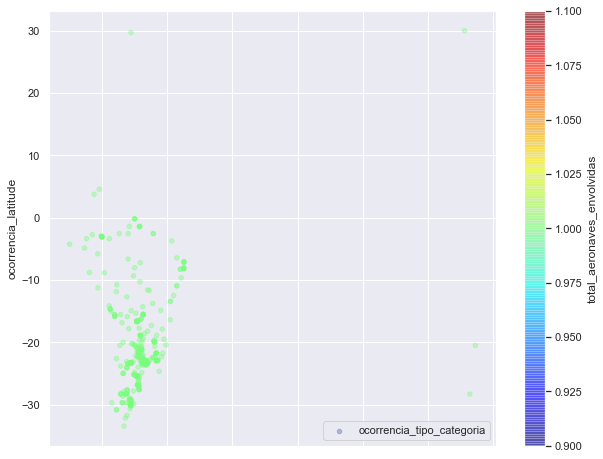

In [54]:
gr3=aero2.plot(kind='scatter', x='ocorrencia_longitude', y='ocorrencia_latitude', label='ocorrencia_tipo_categoria', c='total_aeronaves_envolvidas',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
gr3.legend()

## Removendo outliers

In [55]:
aero2 = aero1.query('ocorrencia_latitude < 10 & ocorrencia_longitude < -33')
aero2

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,SJOG,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,SSKW,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,SSKW,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
3,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,SSKW,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
8,201604062021424,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.7633,-62.4094,AMAJARI,RR,SWAQ,...,16:05:00,SIM,FINALIZADA,A-063/CENIPA/2016,SIM,2017-06-22,2,1,SIM,2018-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,201310121452072,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-21.5571,-45.4319,VARGINHA,MG,SBVG,...,12:25:00,NaN,FINALIZADA,IG-182/CENIPA/2013,SIM,2015-02-09,0,1,NÃO,2018-08-28
5187,201505293589133,ACIDENTE,POUSO LONGO,EXCURSÃO DE PISTA,RE,-20.7447,-42.8419,VIÇOSA,MG,SNVC,...,19:10:00,NaN,FINALIZADA,A-080/CENIPA/2015,SIM,2016-06-16,1,1,NÃO,2018-08-28
5188,201406236453857,INCIDENTE GRAVE,OUTROS,OUTROS,OTHR,-30.8394,-55.5672,SANTANA DO LIVRAMENTO,RS,SSZW,...,13:45:00,NaN,FINALIZADA,IG-114/CENIPA/2014,SIM,2015-04-24,0,1,NÃO,2018-08-28
5189,201704150134378,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-30.8436,-55.5728,SANTANA DO LIVRAMENTO,RS,SIXD,...,15:30:00,SIM,FINALIZADA,A-059/CENIPA/2017,SIM,2018-05-10,0,1,SIM,2018-08-28


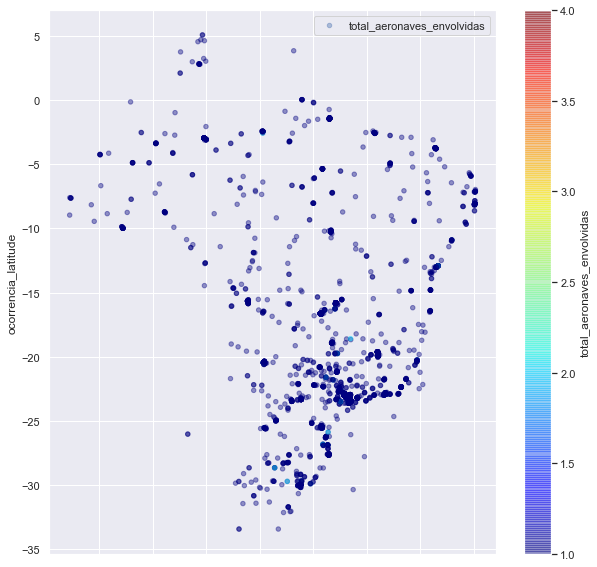

In [56]:
gr3=aero2.plot(kind='scatter', x='ocorrencia_longitude', y='ocorrencia_latitude', label='total_aeronaves_envolvidas', c='total_aeronaves_envolvidas',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,10))
gr3.legend()

# Avaliando quantidade de acidentes por aeroporto

In [57]:
# para SBBR por exemplo
aero2.query('ocorrencia_latitude < 10 & ocorrencia_longitude < -33')
aero2

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,SJOG,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,SSKW,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,SSKW,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
3,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,SSKW,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
8,201604062021424,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.7633,-62.4094,AMAJARI,RR,SWAQ,...,16:05:00,SIM,FINALIZADA,A-063/CENIPA/2016,SIM,2017-06-22,2,1,SIM,2018-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,201310121452072,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-21.5571,-45.4319,VARGINHA,MG,SBVG,...,12:25:00,NaN,FINALIZADA,IG-182/CENIPA/2013,SIM,2015-02-09,0,1,NÃO,2018-08-28
5187,201505293589133,ACIDENTE,POUSO LONGO,EXCURSÃO DE PISTA,RE,-20.7447,-42.8419,VIÇOSA,MG,SNVC,...,19:10:00,NaN,FINALIZADA,A-080/CENIPA/2015,SIM,2016-06-16,1,1,NÃO,2018-08-28
5188,201406236453857,INCIDENTE GRAVE,OUTROS,OUTROS,OTHR,-30.8394,-55.5672,SANTANA DO LIVRAMENTO,RS,SSZW,...,13:45:00,NaN,FINALIZADA,IG-114/CENIPA/2014,SIM,2015-04-24,0,1,NÃO,2018-08-28
5189,201704150134378,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-30.8436,-55.5728,SANTANA DO LIVRAMENTO,RS,SIXD,...,15:30:00,SIM,FINALIZADA,A-059/CENIPA/2017,SIM,2018-05-10,0,1,SIM,2018-08-28
